# 1984 Forensics (becomes 1986)

In [3]:
%matplotlib notebook

In [4]:
# imports
from importlib import reload
import os 
import datetime
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


import pandas
import iris
import iris.quickplot as qplt
from cf_units import Unit

from oceanpy.sst import io as sst_io
from oceanpy.utils import catalog

from mhw_analysis.events import utils as mhwe_utils
from mhw_analysis.events import io as mhwe_io
from mhw_analysis.systems import io as mhws_io

# View a few days

## Load full cube

In [4]:
reload(mhwe_io)
ecube = mhwe_io.load_event_cube()

In [5]:
ecube

<iris 'Cube' of Events / (1) (latitude: 720; longitude: 1440; time: 13879)>

## Plot a day or two

### 1984-Jun-01

In [6]:
constraint = iris.Constraint(time=iris.time.PartialDateTime(
    day=1, year=1984, month=6))
ecube_1984_06_01 = ecube.extract(constraint)
ecube_1984_06_01

<iris 'Cube' of Events / (1) (latitude: 720; longitude: 1440)>

<IPython.core.display.Javascript object>


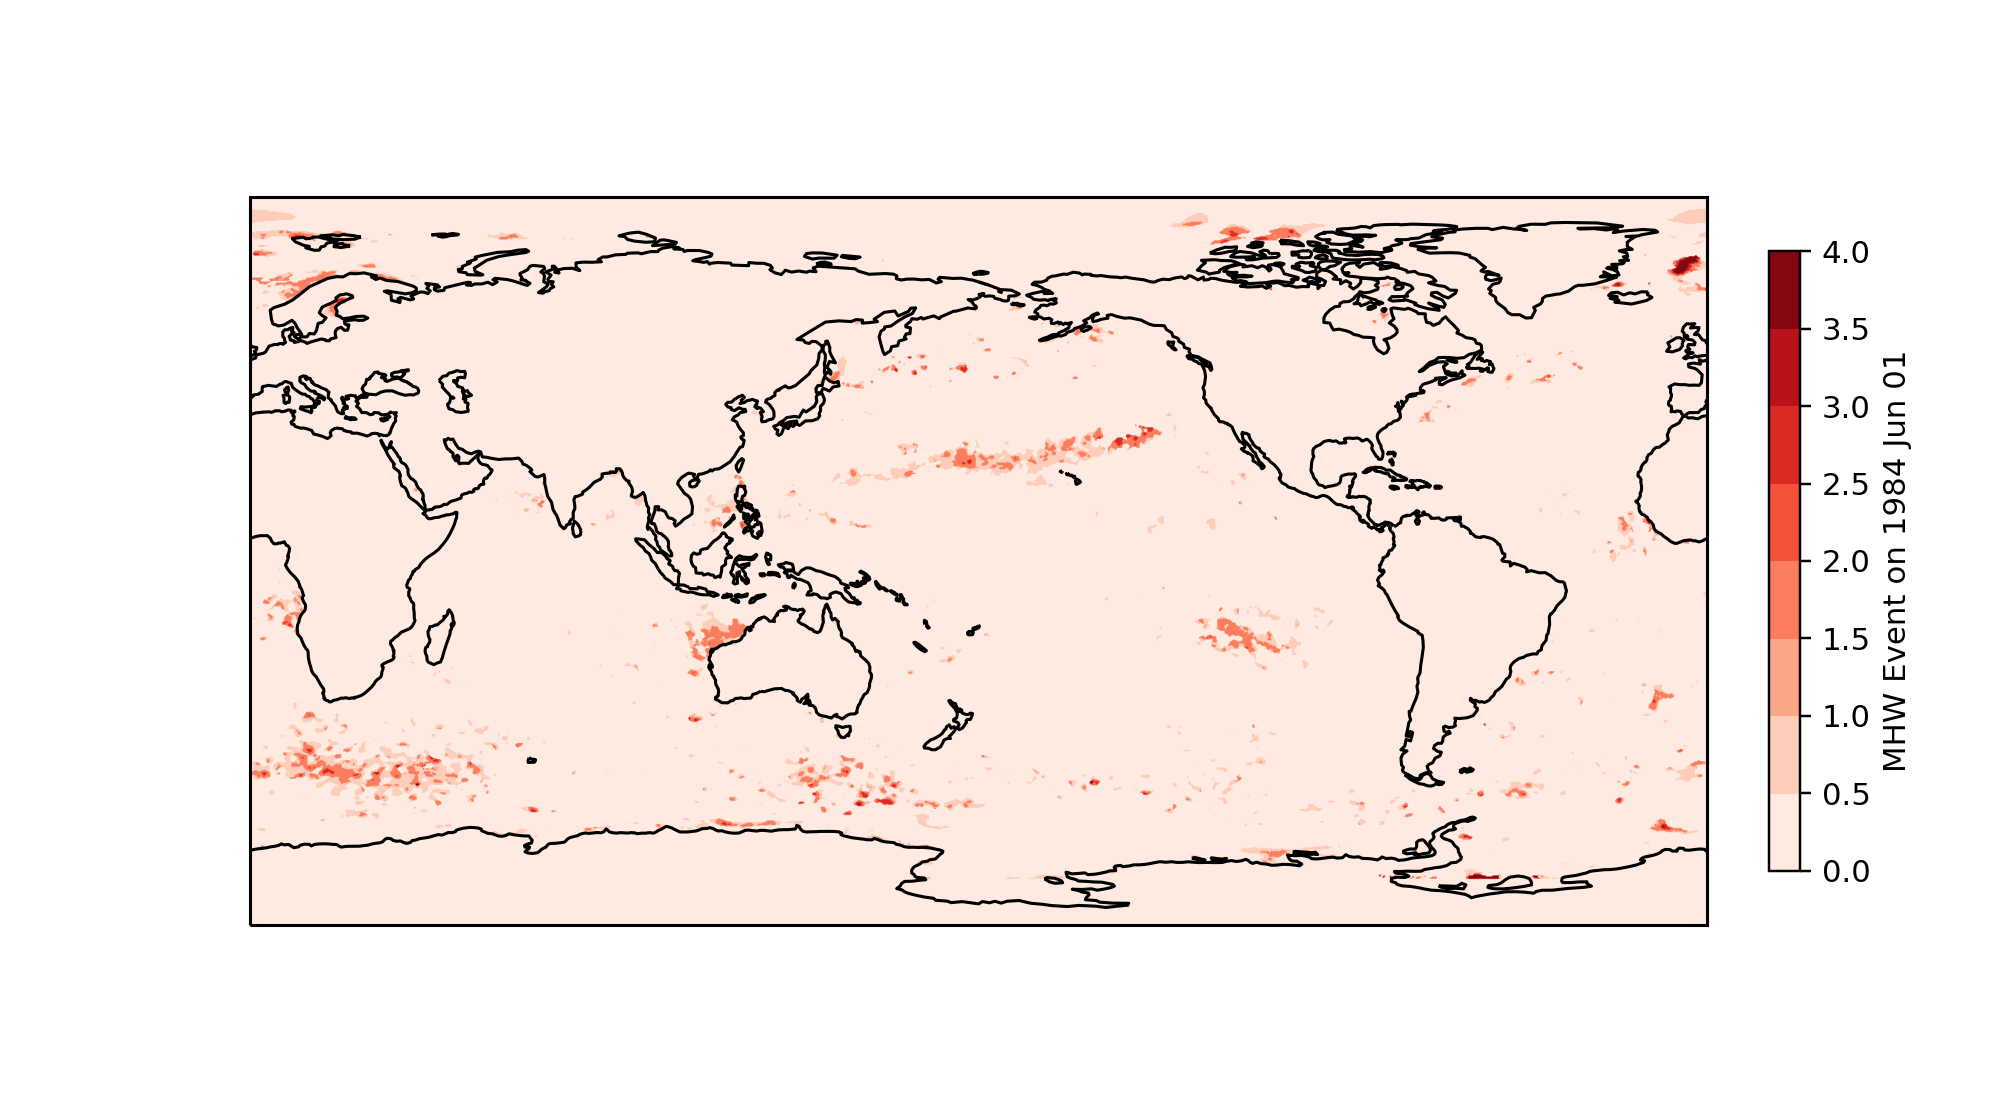

In [9]:
fig = plt.figure(figsize=(9, 5))
plt.clf()

proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = plt.gca(projection=proj)

# Pacific events
# Draw the contour with 25 levels.
cm = plt.get_cmap('Reds')

cplt = iris.plot.contourf(ecube_1984_06_01, cmap=cm)  # , vmin=0, vmax=20)#, 5)
cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
cb.set_label('MHW Event on 1984 Jun 01')

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.show()

### 1984 Oct 01

In [10]:
constraint = iris.Constraint(time=iris.time.PartialDateTime(
    day=1, year=1984, month=10))
ecube_1984_10_01 = ecube.extract(constraint)
ecube_1984_10_01

<iris 'Cube' of Events / (1) (latitude: 720; longitude: 1440)>

<IPython.core.display.Javascript object>


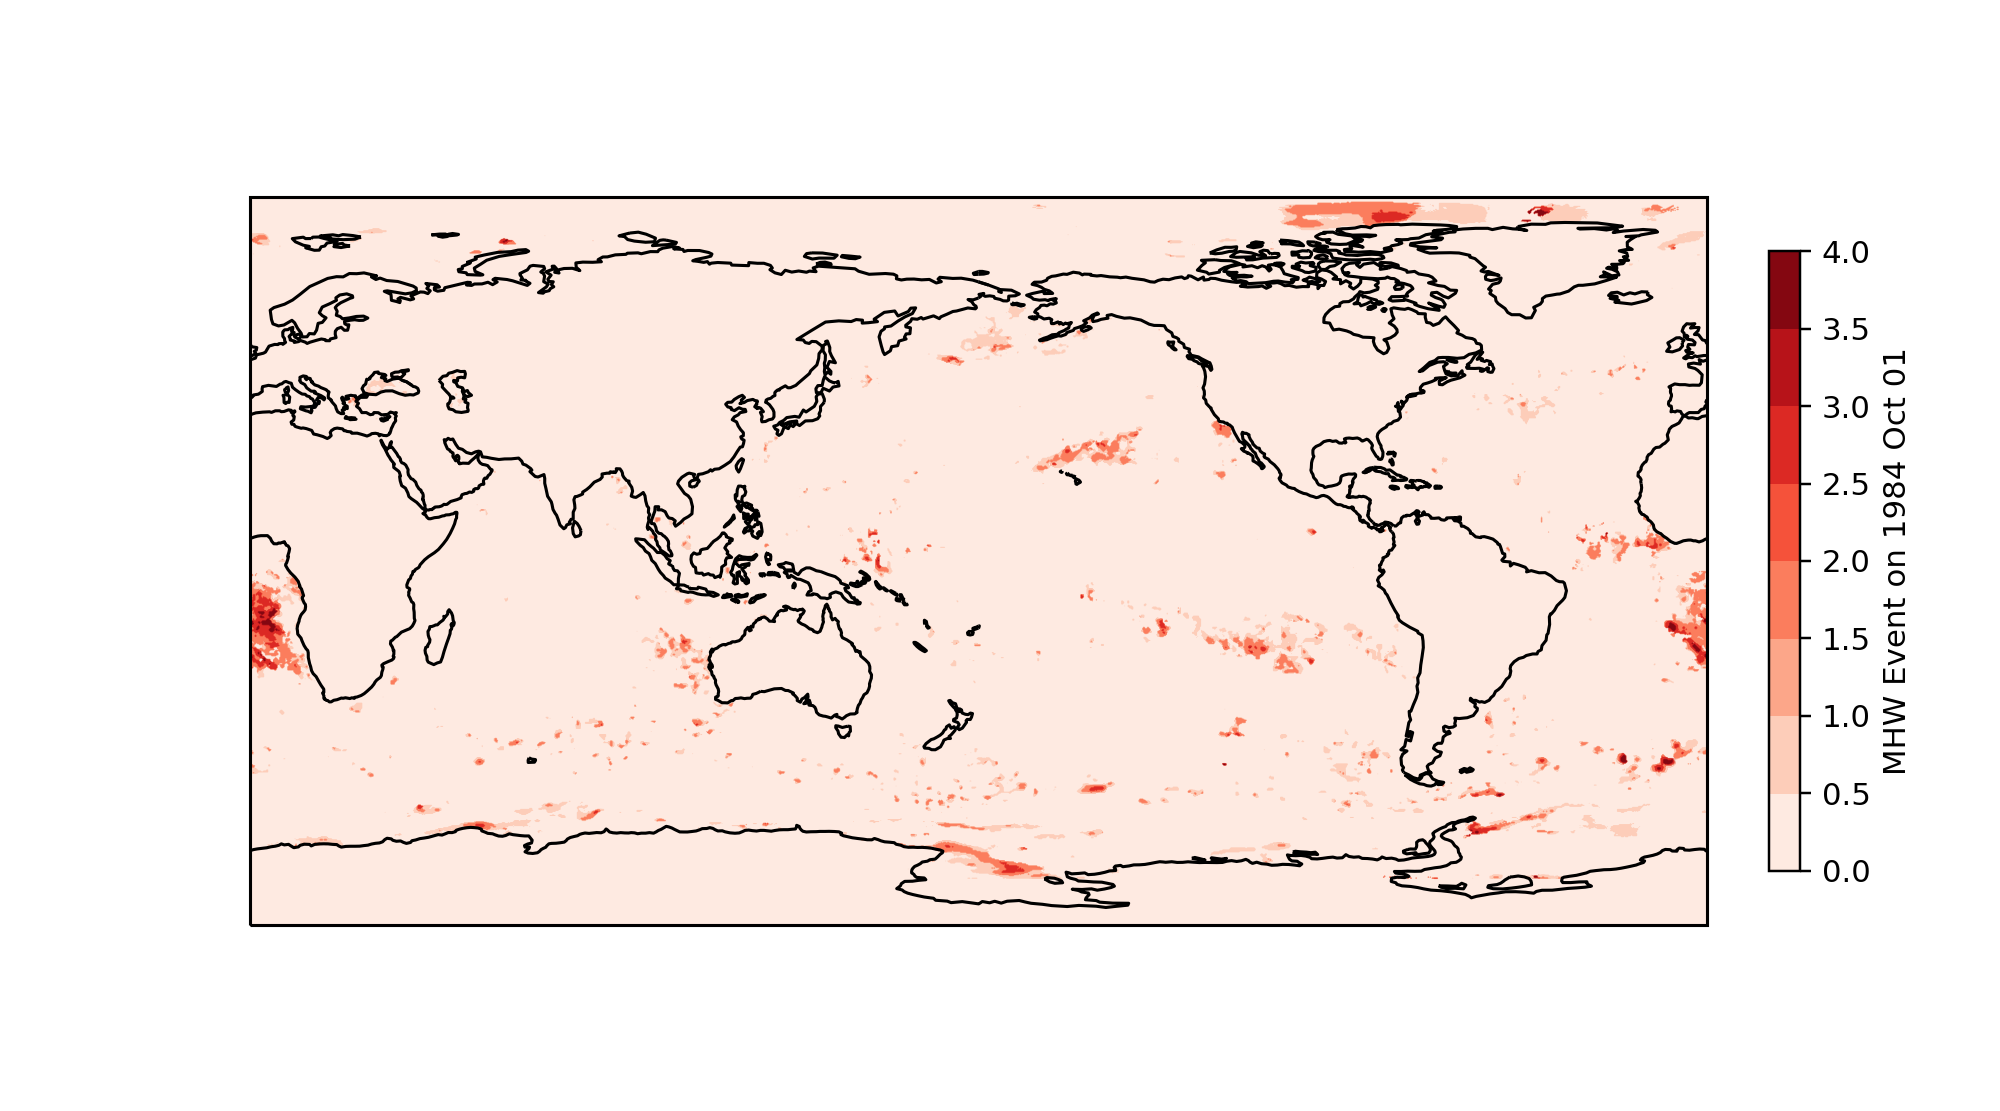

In [11]:
fig = plt.figure(figsize=(9, 5))
plt.clf()

proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = plt.gca(projection=proj)

# Pacific events
# Draw the contour with 25 levels.
cm = plt.get_cmap('Reds')

cplt = iris.plot.contourf(ecube_1984_10_01, cmap=cm)  # , vmin=0, vmax=20)#, 5)
cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
cb.set_label('MHW Event on 1984 Oct 01')

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.show()

# Raw calculation

## 1984

In [12]:
pdt1 = iris.time.PartialDateTime(year=1984, month=1, day=1)
pdt2 = iris.time.PartialDateTime(year=1984, month=12, day=31)
#
constraint = iris.Constraint(time=lambda cell: pdt1 <= cell.point <= pdt2)
ecube_1984 = ecube.extract(constraint)

In [13]:
ecube_1984

<iris 'Cube' of Events / (1) (latitude: 720; longitude: 1440; time: 366)>

In [14]:
n_events_1984 = np.sum(ecube_1984.data[:] > 0)
n_events_1984

16223460

## 1985

In [15]:
pdt1 = iris.time.PartialDateTime(year=1985, month=1, day=1)
pdt2 = iris.time.PartialDateTime(year=1985, month=12, day=31)
#
constraint = iris.Constraint(time=lambda cell: pdt1 <= cell.point <= pdt2)
ecube_1985 = ecube.extract(constraint)

In [16]:
n_events_1985 = np.sum(ecube_1985.data[:] > 0)
n_events_1985

12126267

In [17]:
n_events_1984/n_events_1985

1.337877518283244

In [18]:
np.log10(n_events_1984)

7.2101434823448605

## 1983?

In [20]:
pdt1 = iris.time.PartialDateTime(year=1983, month=1, day=1)
pdt2 = iris.time.PartialDateTime(year=1983, month=12, day=31)
#
constraint = iris.Constraint(time=lambda cell: pdt1 <= cell.point <= pdt2)
ecube_1983 = ecube.extract(constraint)

In [22]:
n_events_1983 = np.sum(ecube_1983.data[:] > 0)
n_events_1983, np.log10(n_events_1983)

(20017252, 7.3014044566022775)

----

# One *big* System

## Load a portion of the mask

In [24]:
mask = mhws_io.load_mask((1984,2,4), (1985,2,4))

In [25]:
mask

Mask (unknown),latitude,longitude,time
Shape,720,1440,367
Dimension coordinates,,,
latitude,x,-,-
longitude,-,x,-
time,-,-,x


In [26]:
np.unique(mask.data[:])

array([      0,      11,      15, ..., 2623636, 2624056, 2624966],
      dtype=int32)

In [27]:
bigone = mask.data[:] == 376

In [28]:
np.sum(bigone)

0

## Try again

In [30]:
t0 = datetime.date.fromordinal(datetime.date(1982,1,1).toordinal() + 9258)
t0

datetime.date(2007, 5, 8)

In [33]:
t1 = datetime.date.fromordinal(datetime.date(1982,1,1).toordinal() + 13877)
t1

datetime.date(2019, 12, 30)

In [40]:
mask2 = mhws_io.load_mask((2007,5,8), (2012,5,8))

In [41]:
bigone2 = mask2.data[:] == 376
np.sum(bigone2)

76327879

## Plot

In [66]:
bigone2.shape

(720, 1440, 1828)

In [67]:
any_mask = np.sum(bigone2[:,:,200:201], axis=2)
any_mask[any_mask > 0] = 1
any_mask.shape

(720, 1440)

In [68]:
any_big_cube = iris.cube.Cube(any_mask, var_name='Blob',
                      dim_coords_and_dims=[(mask2.coords('latitude')[0], 0),
                                           (mask2.coords('longitude')[0], 1)])

In [69]:
any_big_cube

Blob (unknown),latitude,longitude
Shape,720,1440
Dimension coordinates,,
latitude,x,-
longitude,-,x


<IPython.core.display.Javascript object>


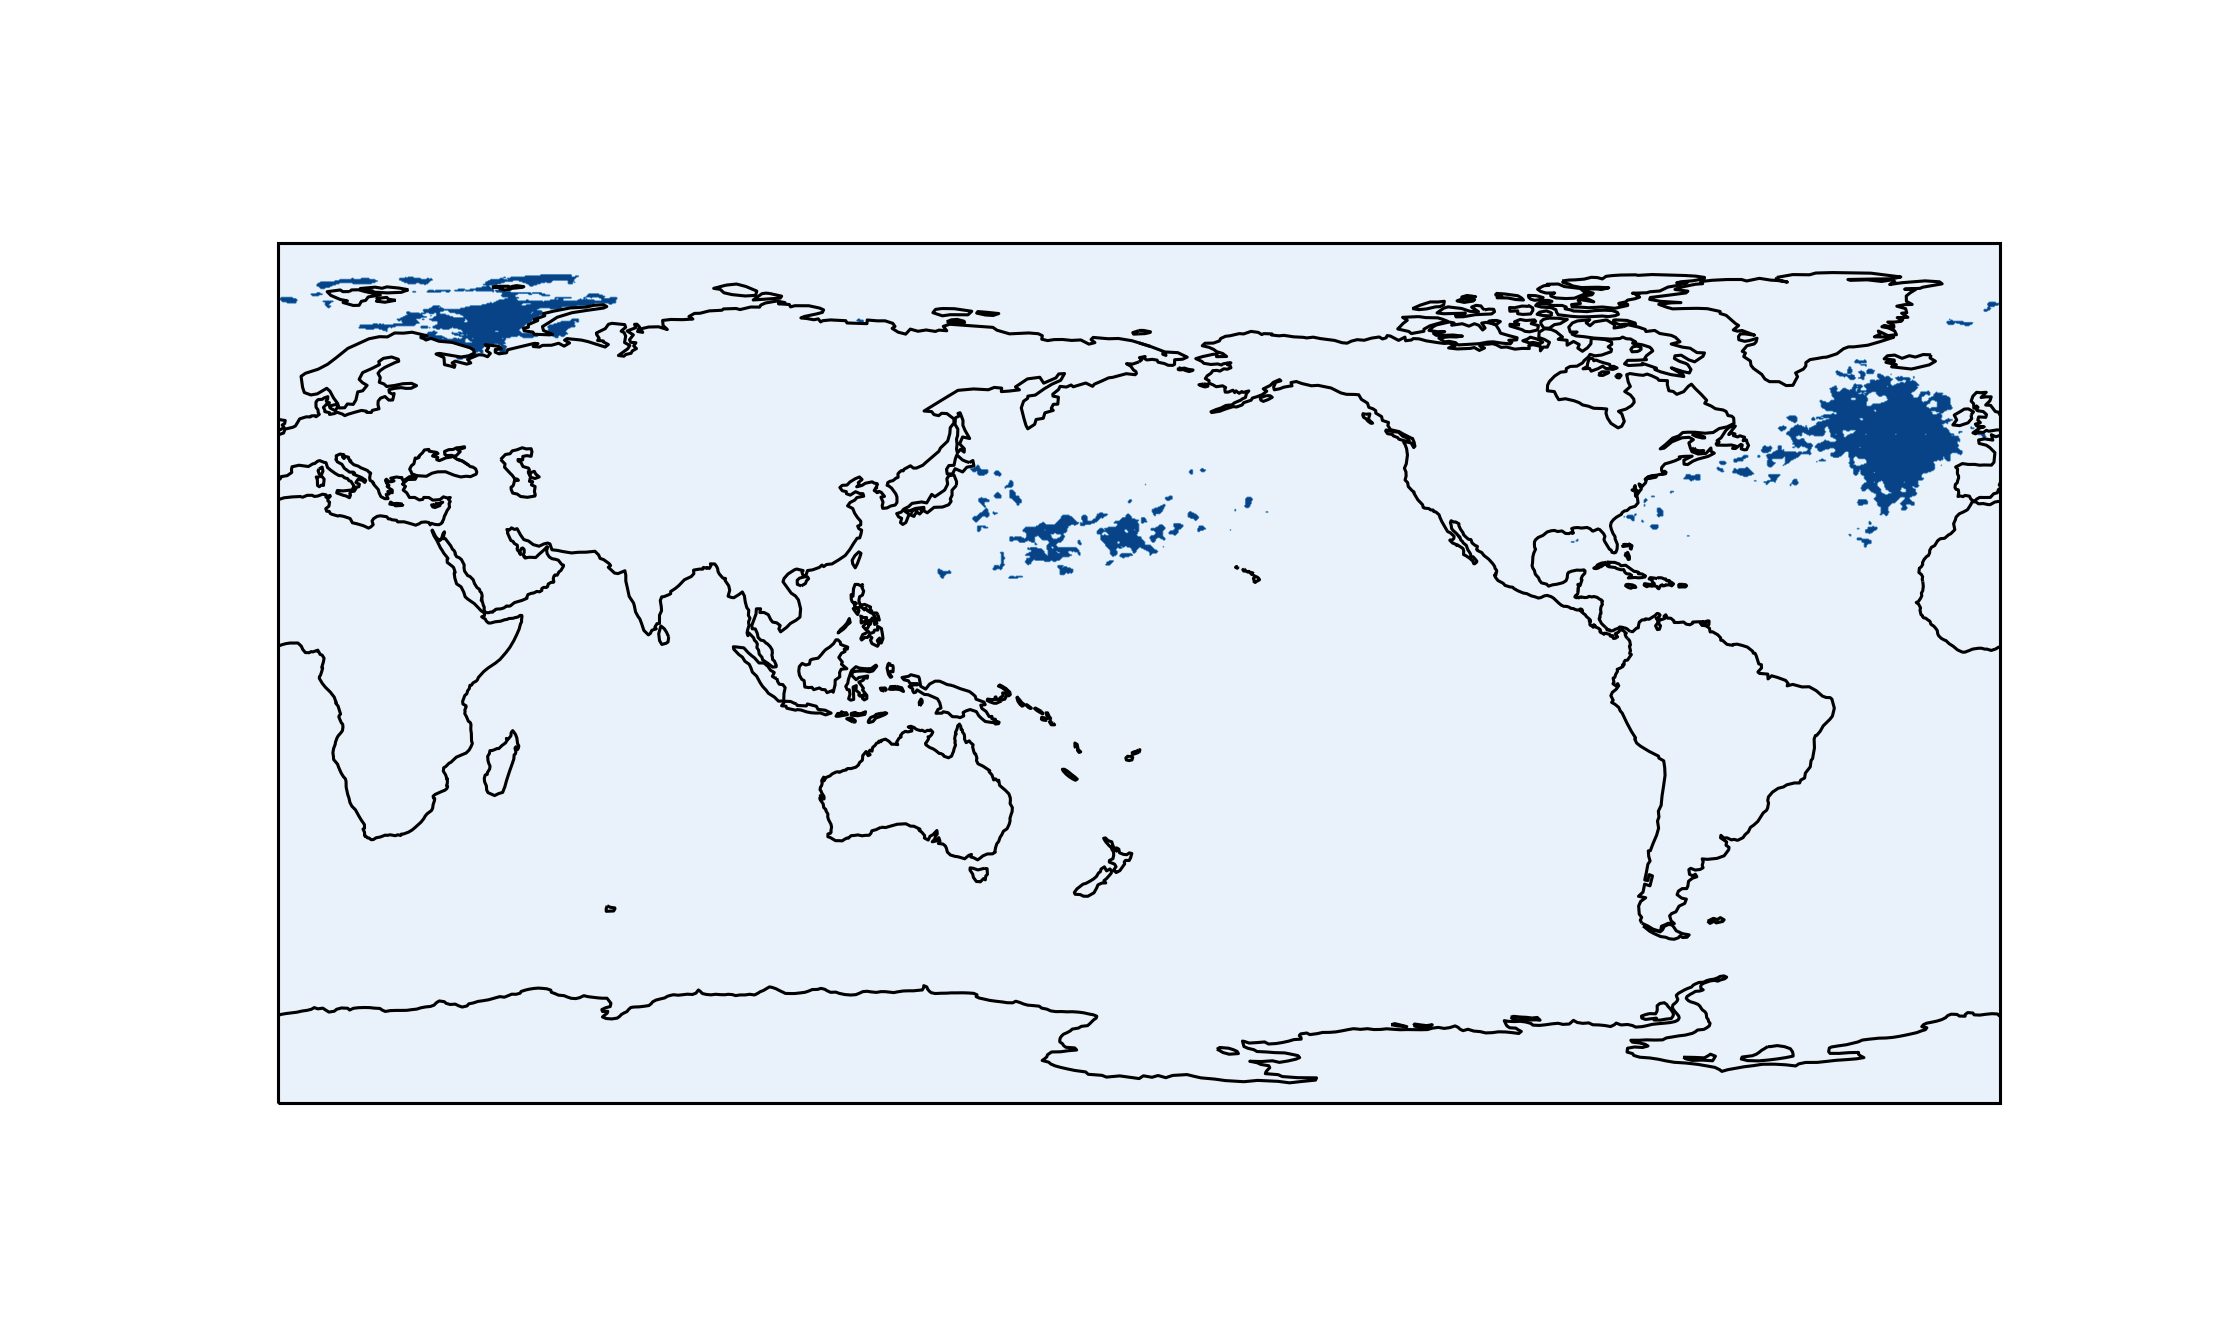

In [70]:
fig = plt.figure(figsize=(10, 6))
plt.clf()

proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = plt.gca(projection=proj)

# Pacific events
# Draw the contour with 25 levels.
cm = plt.get_cmap('Blues')

cplt = iris.plot.contourf(any_big_cube, cmap=cm)  # , vmin=0, vmax=20)#, 5)
#cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
#cb.set_label('Blob')

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.show()

## Check another day or two

In [51]:
constraint = iris.Constraint(time=iris.time.PartialDateTime(
    day=1, year=2010, month=6))
ecube_2010_06_01 = ecube.extract(constraint)
ecube_2010_06_01

<iris 'Cube' of Events / (1) (latitude: 720; longitude: 1440)>

<IPython.core.display.Javascript object>


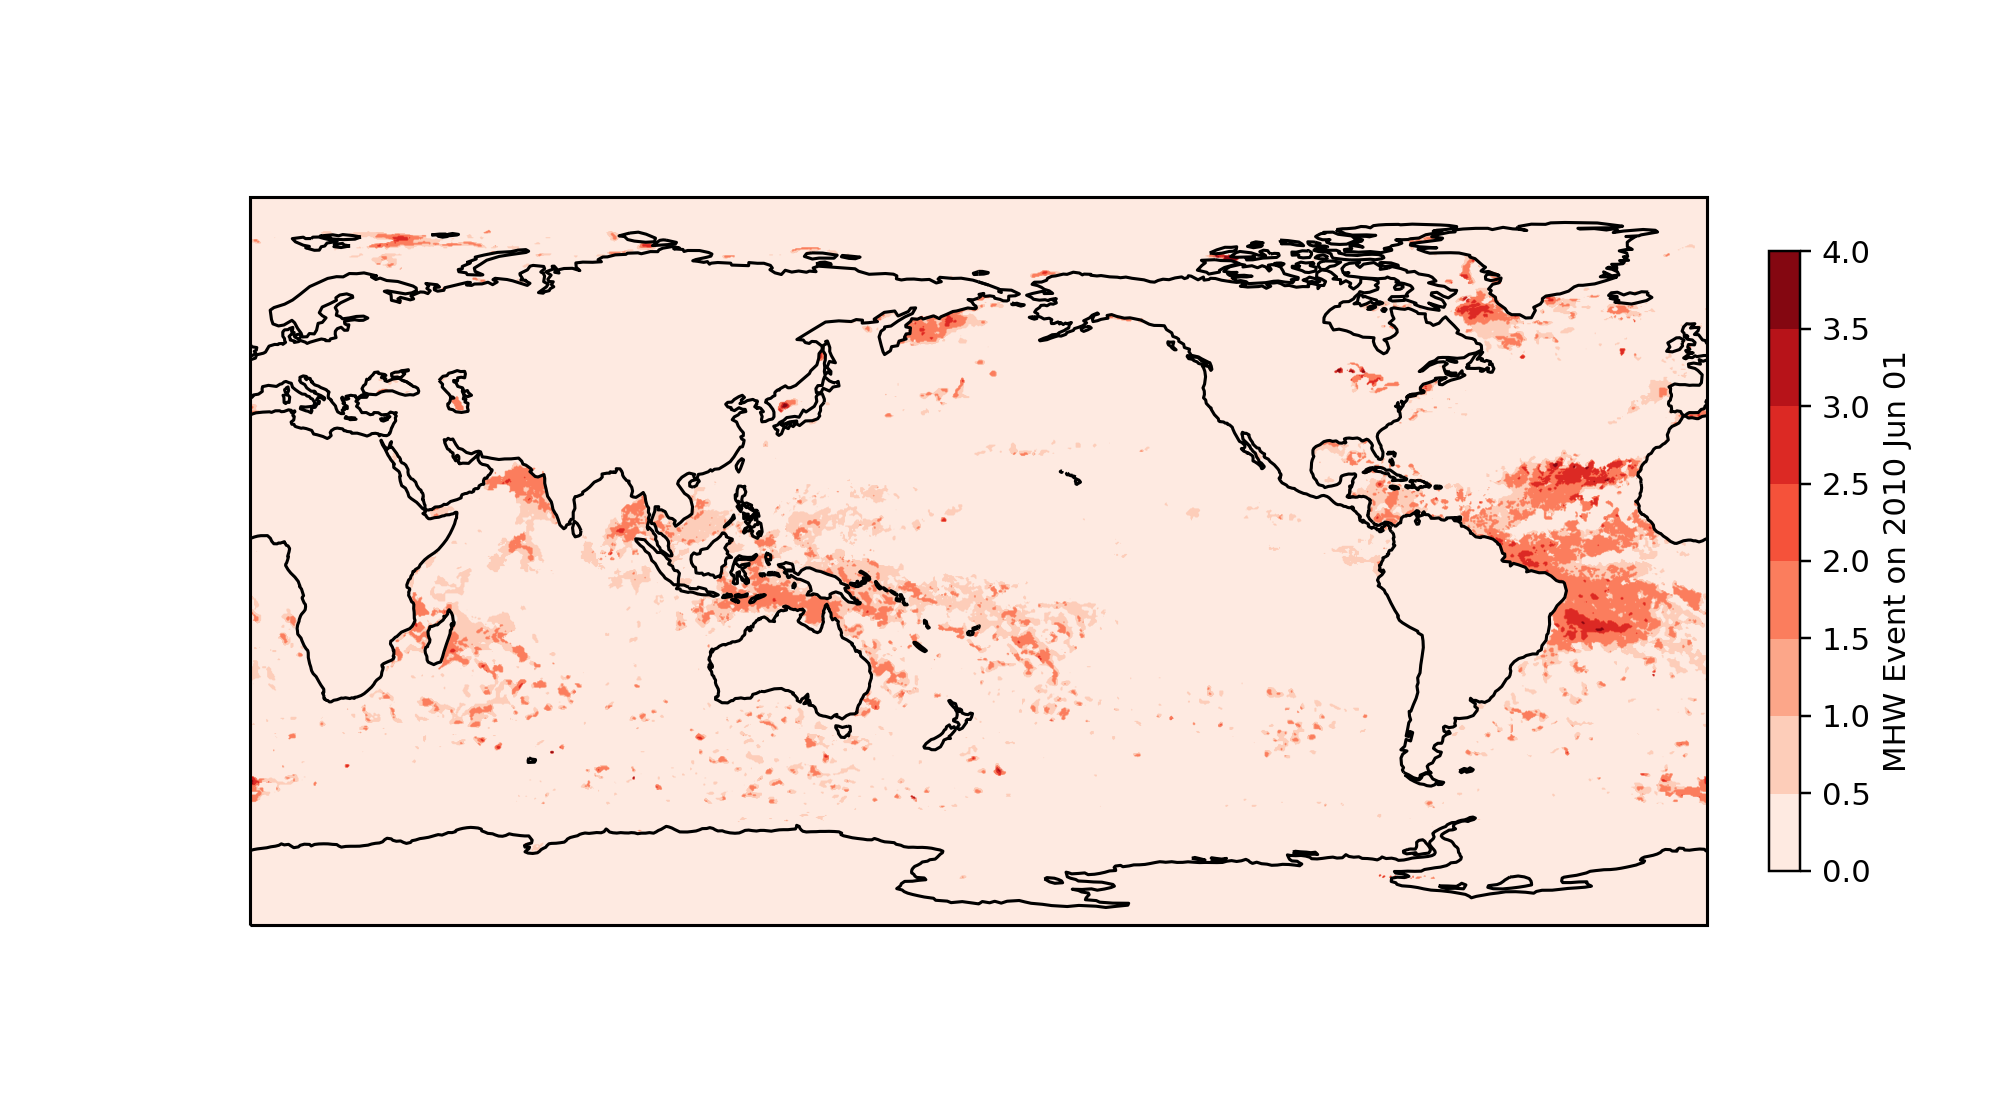

In [52]:
fig = plt.figure(figsize=(9, 5))
plt.clf()

proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = plt.gca(projection=proj)

# Pacific events
# Draw the contour with 25 levels.
cm = plt.get_cmap('Reds')

cplt = iris.plot.contourf(ecube_2010_06_01, cmap=cm)  # , vmin=0, vmax=20)#, 5)
cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
cb.set_label('MHW Event on 2010 Jun 01')

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.show()

In [56]:
constraint = iris.Constraint(time=iris.time.PartialDateTime(
    day=1, year=2011, month=2))
ecube_2011_02_01 = ecube.extract(constraint)
ecube_2011_02_01

<iris 'Cube' of Events / (1) (latitude: 720; longitude: 1440)>

<IPython.core.display.Javascript object>


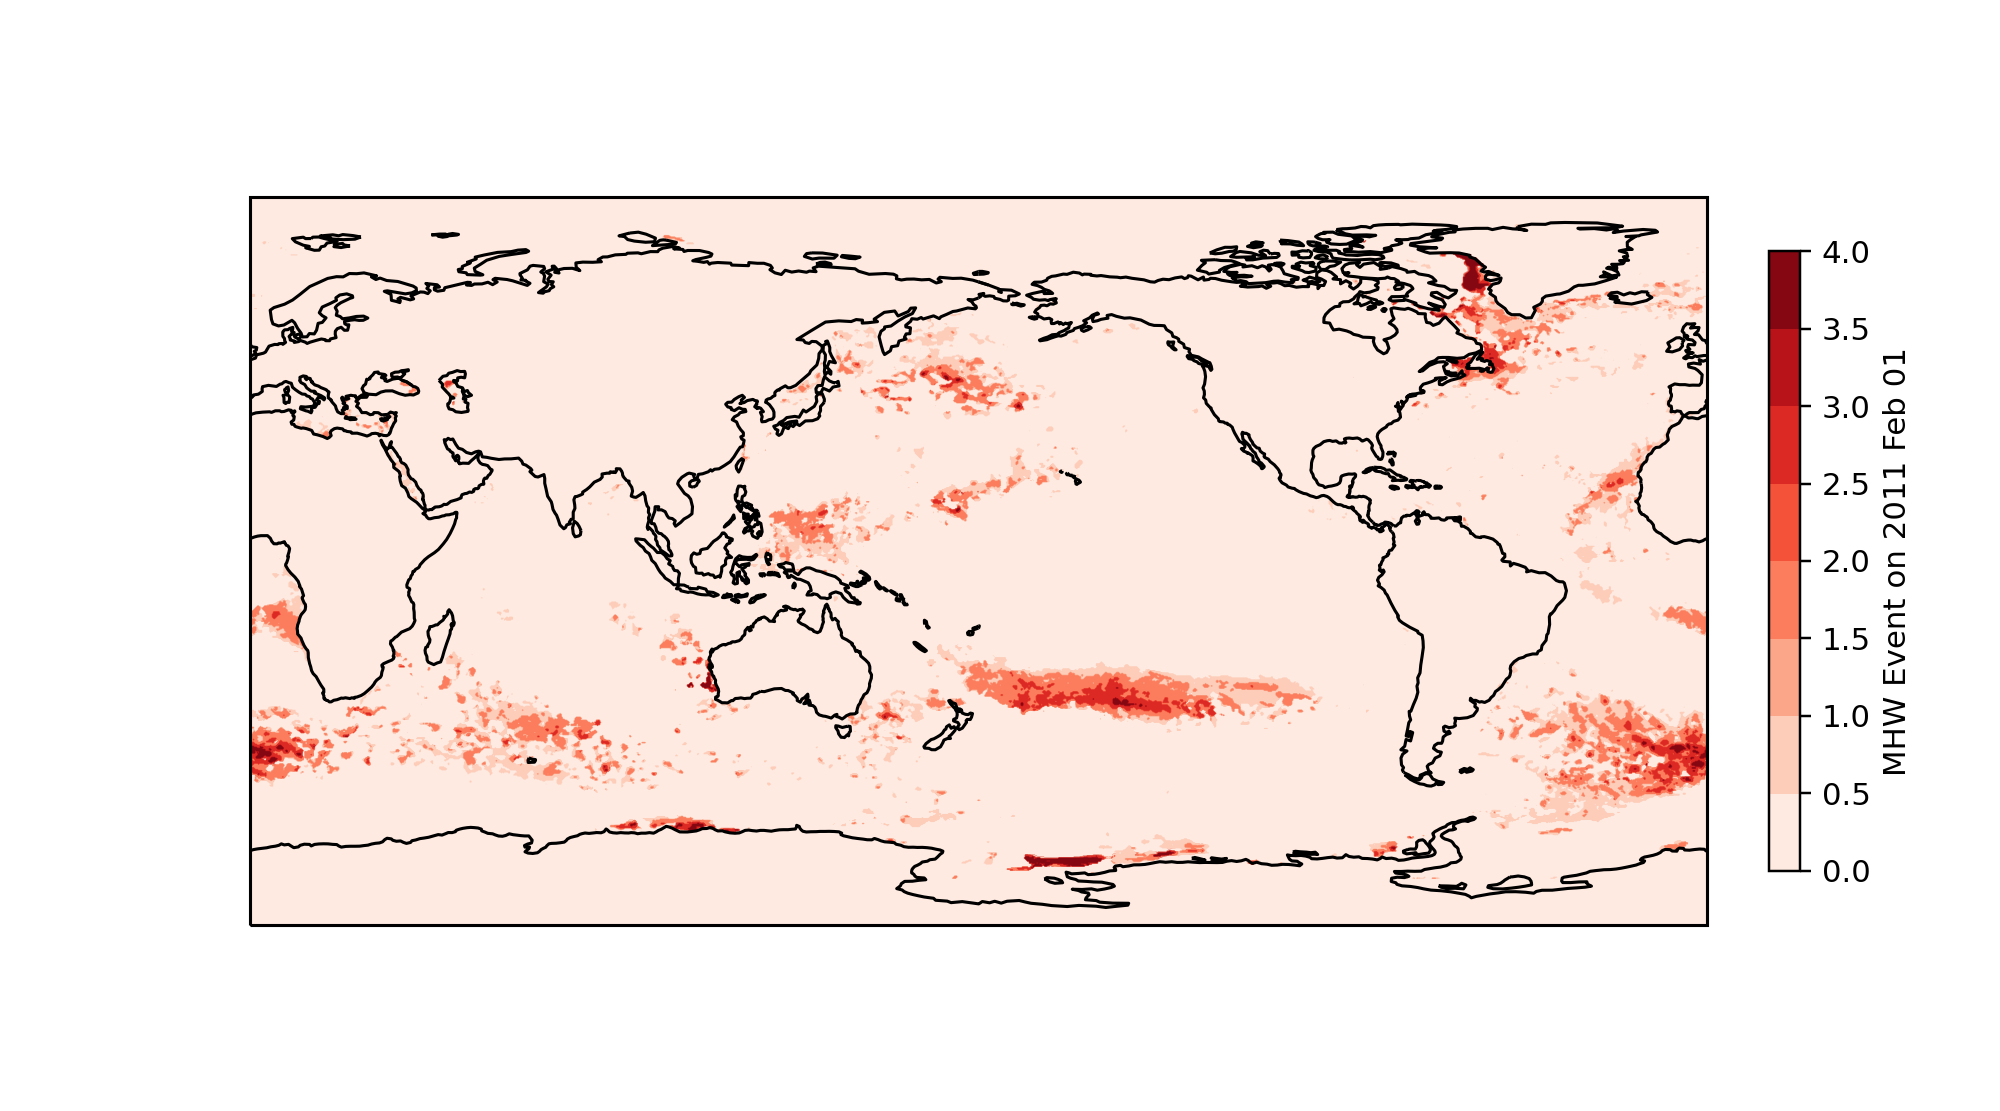

In [57]:
fig = plt.figure(figsize=(9, 5))
plt.clf()

proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = plt.gca(projection=proj)

# Pacific events
# Draw the contour with 25 levels.
cm = plt.get_cmap('Reds')

cplt = iris.plot.contourf(ecube_2011_02_01, cmap=cm)  # , vmin=0, vmax=20)#, 5)
cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
cb.set_label('MHW Event on 2011 Feb 01')

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.show()

----

# Varying climate

In [5]:
mhw_mask_file = os.path.join(os.getenv('MHW'), 'db', 'MHW_mask_vary.hdf')

In [125]:
mask = mhws_io.load_mask_from_dates((2008,1,23), (2012,1,23), mhw_mask_file=mhw_mask_file)

In [126]:
mask

Mask (unknown),latitude,longitude,time
Shape,720,1440,1463
Dimension coordinates,,,
latitude,x,-,-
longitude,-,x,-
time,-,-,x


## Bigone

In [127]:
bigone = mask.data[:] == 26868
np.sum(bigone)

48947968

## Plot a few

In [194]:
i0, step = 1400, 50
any_mask = np.sum(bigone[:,:,i0:i0+step], axis=2)
any_mask[any_mask > 0] = 1
np.sum(any_mask)

100296

In [195]:
any_big_cube = iris.cube.Cube(any_mask, var_name='BigOne',
                      dim_coords_and_dims=[(mask.coords('latitude')[0], 0),
                                           (mask.coords('longitude')[0], 1)])

<IPython.core.display.Javascript object>


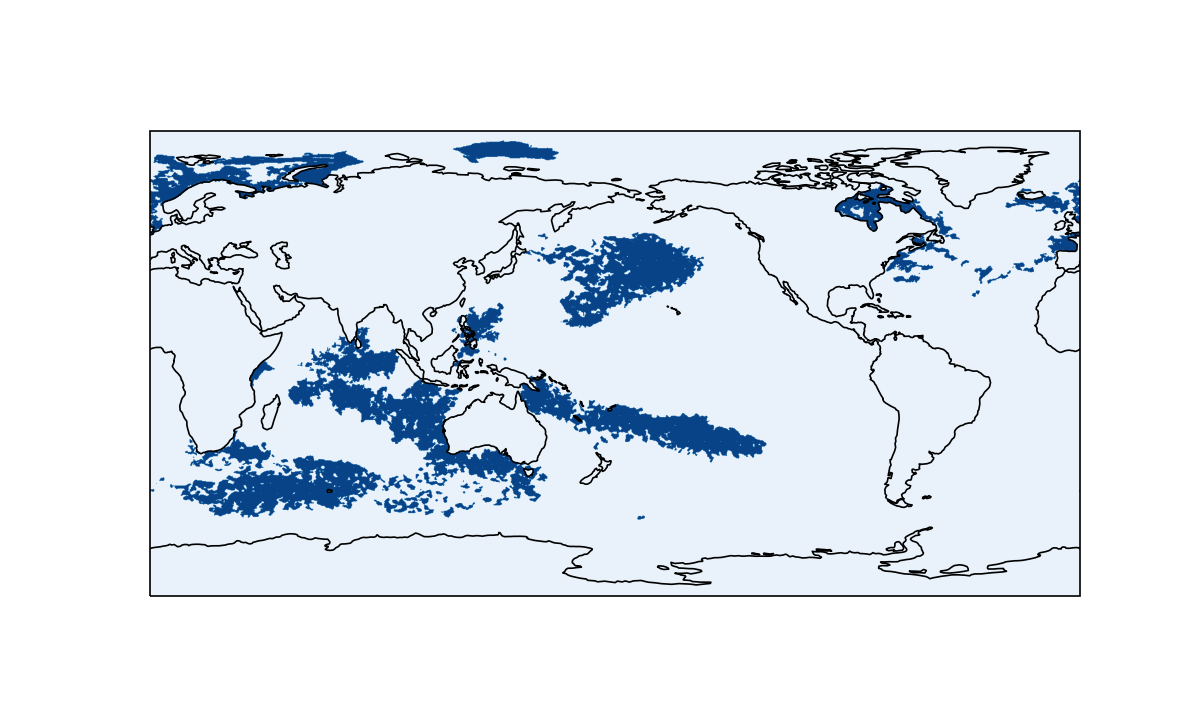

In [196]:
fig = plt.figure(figsize=(10, 6))
plt.clf()

proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = plt.gca(projection=proj)

# Pacific events
# Draw the contour with 25 levels.
cm = plt.get_cmap('Blues')

cplt = iris.plot.contourf(any_big_cube, cmap=cm)  # , vmin=0, vmax=20)#, 5)
#cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
#cb.set_label('Blob')

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.show()